## Project 1

Module: Programming for Data Analysis

Higher Diploma in Computing in Data Analytics

Author: Sofiia Meteliuk

*Note: I initially deleted the first part "draft" after viewing the recording of the Q&A session because I thought I had done it incorrectly. I later decided to restore it to show how my process originated.*


## First draft

### Phenomenon: Online Shopping Behavior and Purchase Decision

**Variables:**

1. Average Time Spent on the Website (Independent Variable): The average time (in minutes) a customer spends browsing an online shopping website during a session.

2. Number of Items in the Shopping Cart (Independent Variable): The count of items added to the customer's shopping cart during a session.

3. Discount Percentage Applied (Independent Variable): The percentage of discount applied to the total purchase.

4. Purchase Amount (Dependent Variable): The total amount spent by the customer in a single transaction.


**Expected Relationships:**

1. Positive relationship between the average time spent on the website and the number of items in the shopping cart.
2. Possible positive relationship between the number of items in the shopping cart and the purchase amount.
3. Negative relationship between the discount percentage applied and the purchase amount.

**Distributions:**

- Average Time Spent on the Website: Normally distributed, with a peak around the average time spent.

- Number of Items in the Shopping Cart: Poisson distribution, as it represents a count of items.

- Discount Percentage Applied: Uniform distribution, assuming various discount percentages are equally likely.

- Purchase Amount: Normally distributed, influenced by the other variables.

**Simulation:**

numpy.random.normal for average time spent and purchase amount.
numpy.random.poisson for the number of items in the shopping cart.
numpy.random.uniform for the discount percentage.



In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


# Number of data points
num_customers = 100

# Simulate data for average time spent (in minutes)
avg_time_spent = np.round(np.random.normal(15, 5, num_customers), 2)

# Simulate data for number of items in the shopping cart
items_in_cart = np.random.poisson(5, num_customers)

# Simulate data for discount percentage
discount_percentage = np.round(np.random.uniform(5, 20, num_customers), 2)

# Simulate relationship and add some randomness for purchase amount
purchase_amount = np.round((avg_time_spent + items_in_cart * 3 - discount_percentage * 2) + np.random.normal(0, 10, num_customers), 2)

# Create a DataFrame to store the simulated data
data = pd.DataFrame({
    'Avg_Time_Spent': avg_time_spent,
    'Items_in_Cart': items_in_cart,
    'Discount_Percentage': discount_percentage,
    'Purchase_Amount': purchase_amount
})

# Display the simulated data
data.head()


,Avg_Time_Spent,Items_in_Cart,Discount_Percentage,Purchase_Amount
0,12.07,7,17.02,-16.65
1,16.66,3,12.50,4.76
2,20.15,3,8.85,28.04
3,14.76,3,11.24,1.00
4,17.86,6,19.90,-6.27


c:\Users\Firefly\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


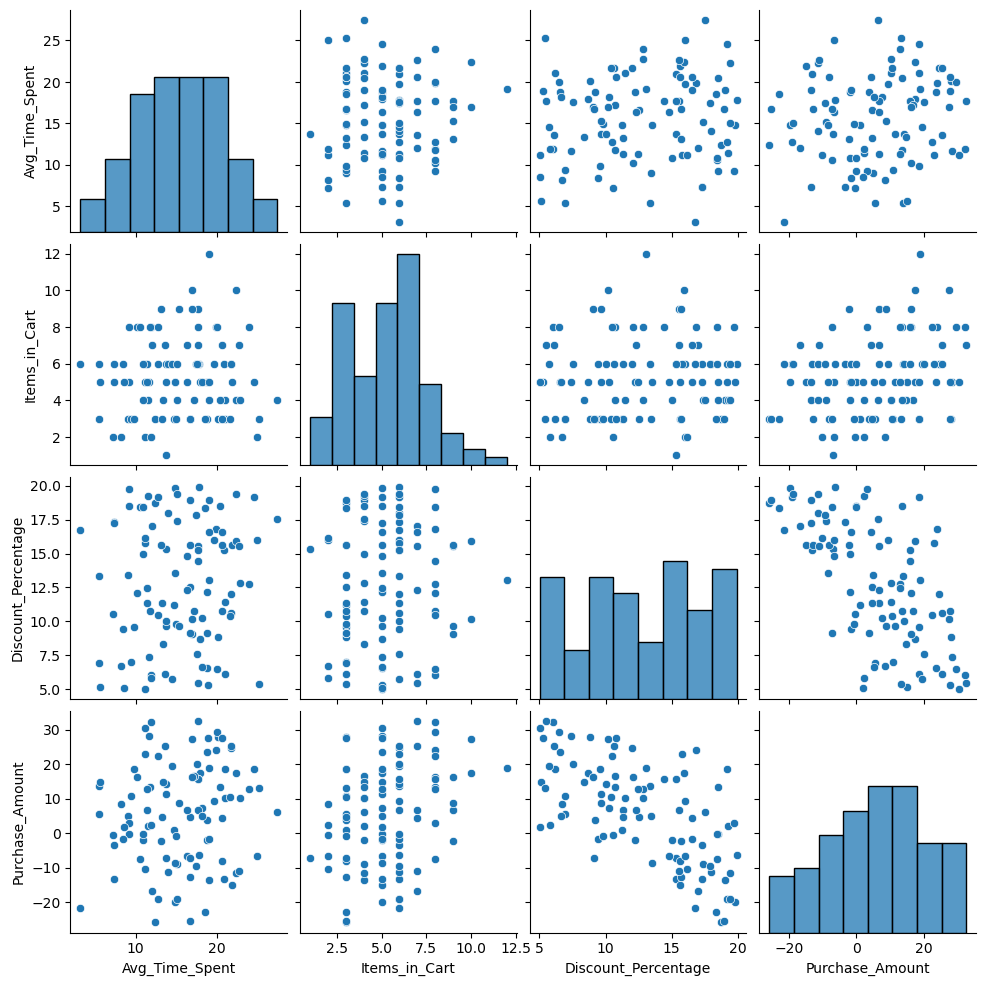

In [4]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

### Pairplot:

Def: The pairplot visually displays relationships between variables.

Scatter plots in the diagonal show the distribution of each variable.

The scatter plots off the diagonal show relationships between pairs of variables.

*Link:* [https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot]

Observations:



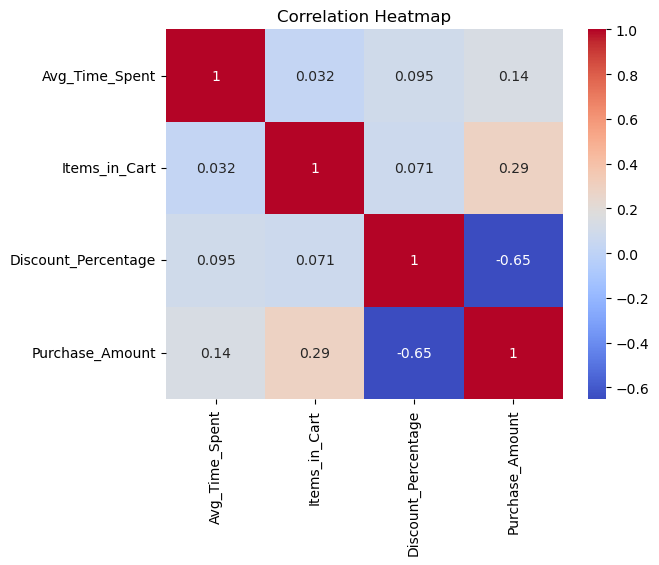

In [5]:
# Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

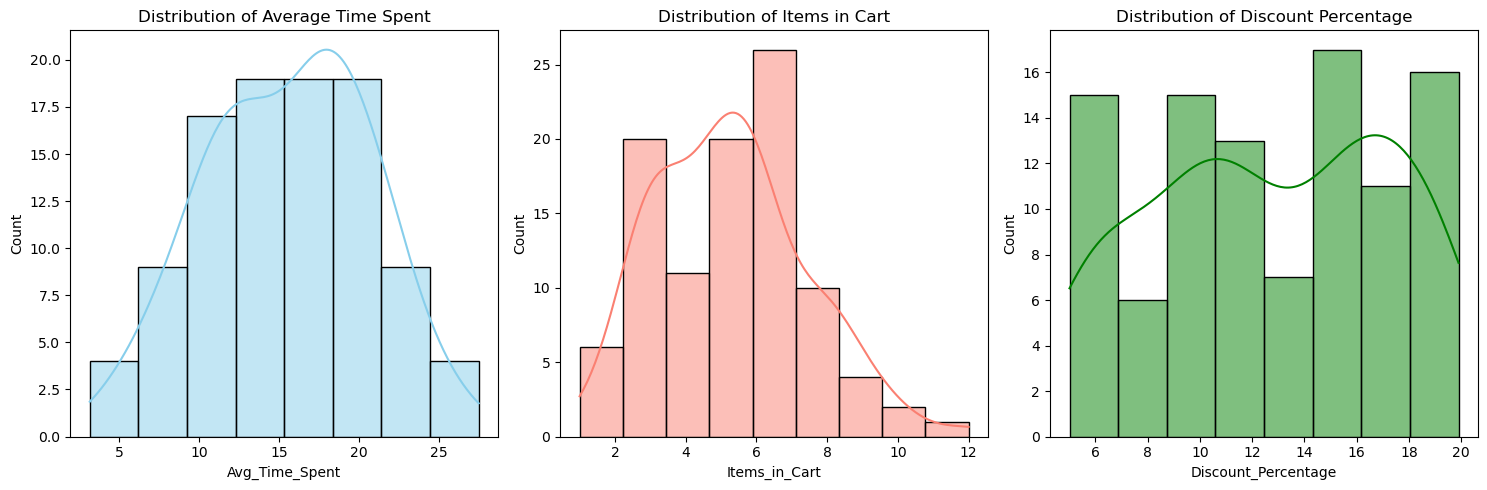

In [6]:
# Distribution plots for each variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Avg_Time_Spent'], kde=True, color='skyblue')
plt.title('Distribution of Average Time Spent')

plt.subplot(1, 3, 2)
sns.histplot(data['Items_in_Cart'], kde=True, color='salmon')
plt.title('Distribution of Items in Cart')

plt.subplot(1, 3, 3)
sns.histplot(data['Discount_Percentage'], kde=True, color='green')
plt.title('Distribution of Discount Percentage')

plt.tight_layout()
plt.show()

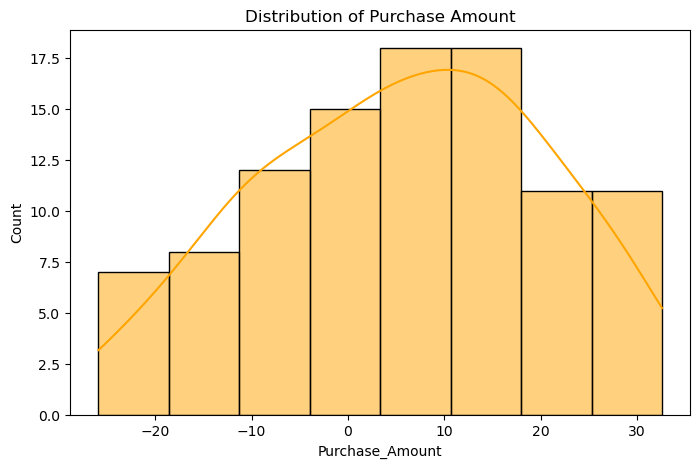

In [7]:

# Distribution plot for the dependent variable
plt.figure(figsize=(8, 5))
sns.histplot(data['Purchase_Amount'], kde=True, color='orange')
plt.title('Distribution of Purchase Amount')
plt.show()

## End of the first draft
__________________________


# Project 1

## 1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

Simulating a data set based on the Online Shoppers Purchasing Intention Dataset from UCI Machine Learning Repository
 [*link: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset*].

Loading the Online Shoppers Purchasing Intention Dataset and focusing on successful transactions

In [8]:


# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df = pd.read_csv(url)

# Filter for successful transactions (REVENUE = True)
df_successful = df[df['Revenue'] == True]

# Display the first few rows of the filtered dataset
df_successful.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True


## 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other

For the purpose of this project, I'll focus on the following variables:

**BounceRates**: The percentage of visitors who enter the site and "bounce" (leave the site) rather than continuing to view other pages within the same site.

**ExitRates**: The percentage of visitors who exit the site from that page after visiting it.

**PageValues**: The average value of the page averaged over the session.

**ProductRelated_Duration**: The total time spent by the visitor on product-related pages during the session.


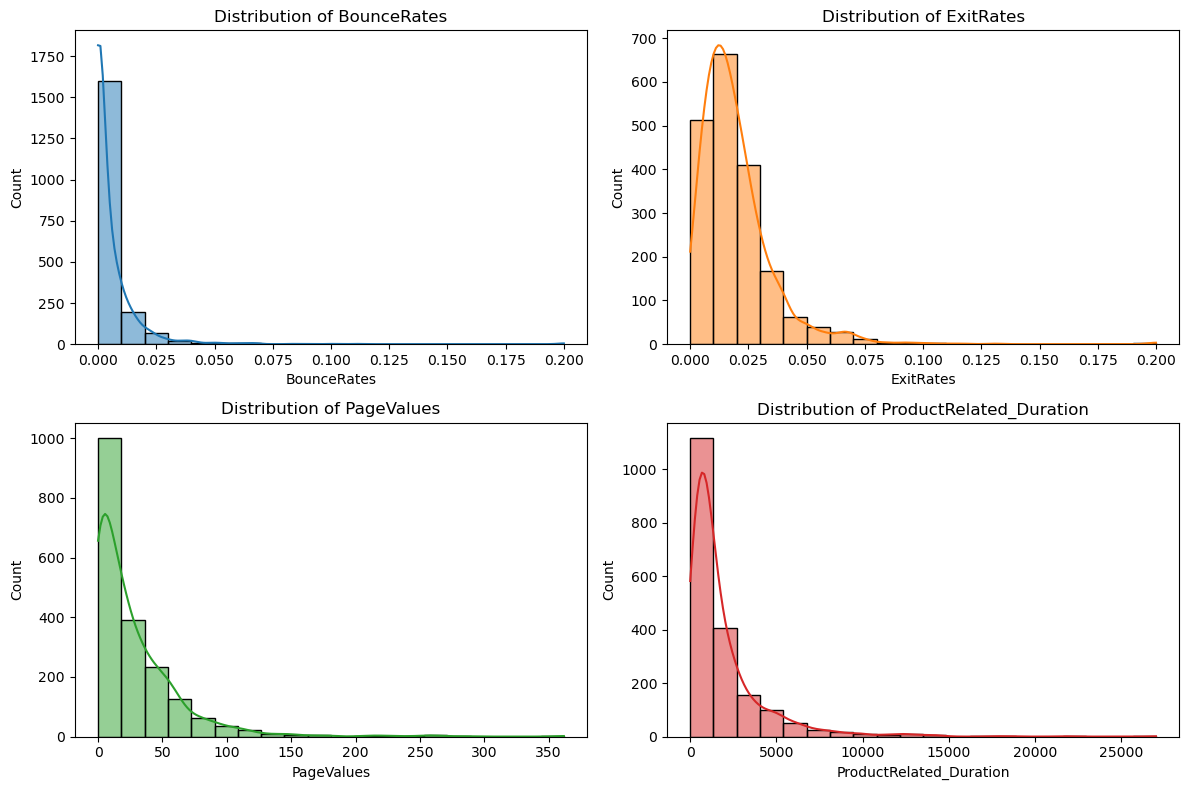

c:\Users\Firefly\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


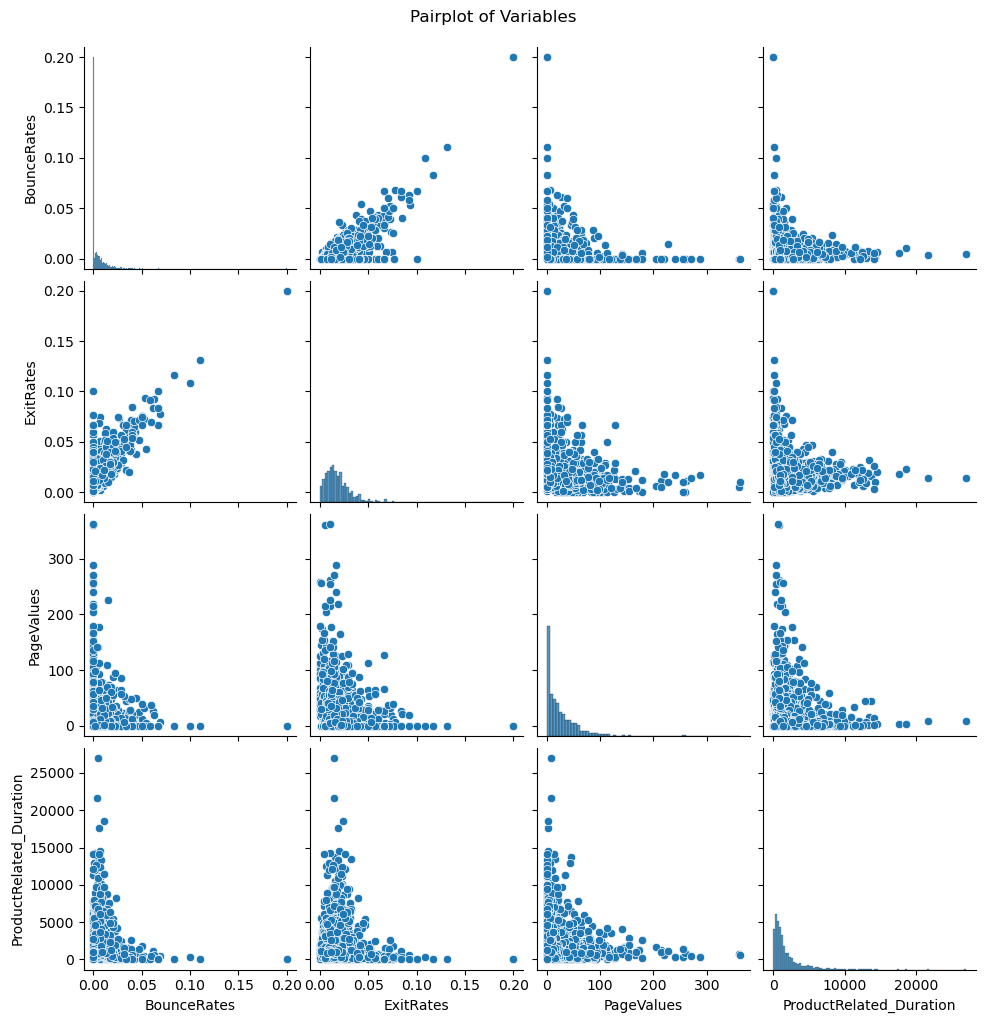

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Variables of interest
variables_of_interest = ['BounceRates', 'ExitRates', 'PageValues', 'ProductRelated_Duration']

# Explore variable distributions
plt.figure(figsize=(12, 8))

for i, variable in enumerate(variables_of_interest, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_successful[variable], kde=True, bins=20, color=f'C{i-1}')
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()

# Explore relationships with pairplot
sns.pairplot(df_successful[variables_of_interest])
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()



In [10]:
# Simulate synthetic data
num_successful_transactions = df_successful.shape[0]

# Simulate data for each variable
simulated_data = {
    'BounceRates': np.random.uniform(0, 0.2, num_successful_transactions),
    'ExitRates': np.random.uniform(0, 0.2, num_successful_transactions),
    'PageValues': np.random.normal(10, 5, num_successful_transactions),
    'ProductRelated_Duration': np.random.normal(300, 150, num_successful_transactions),
}

# Create a DataFrame to store the simulated data
simulated_df = pd.DataFrame(simulated_data)

# Display the first few rows of the simulated data
simulated_df.head(10)

,BounceRates,ExitRates,PageValues,ProductRelated_Duration
0,0.177292,0.089002,1.681548,534.091916
1,0.161944,0.120324,6.166127,162.866300
2,0.174755,0.150076,0.427175,132.045430
3,0.146695,0.024060,11.398149,549.981689
4,0.000913,0.068629,5.071986,450.732214
5,0.143394,0.129607,4.078266,91.927182
6,0.139775,0.066357,19.285217,150.577631
7,0.103221,0.131382,17.786479,28.120290
8,0.109037,0.145499,10.997565,441.452385
9,0.125577,0.132369,17.141389,320.198965


Observing DataFrame I found results that were way to big or small. I decided to try simulate data in the same min-max range as original data.

In [12]:
# Find min and max for each variable in the original dataset
min_values = df_successful[variables_of_interest].min()
max_values = df_successful[variables_of_interest].max()

# Simulate data within min-max range
simulated_data = {
    'BounceRates': np.random.uniform(min_values['BounceRates'], max_values['BounceRates'], num_successful_transactions),
    'ExitRates': np.random.uniform(min_values['ExitRates'], max_values['ExitRates'], num_successful_transactions),
    'PageValues': np.random.uniform(min_values['PageValues'], max_values['PageValues'], num_successful_transactions),
    'ProductRelated_Duration': np.random.uniform(min_values['ProductRelated_Duration'], max_values['ProductRelated_Duration'], num_successful_transactions),
}

# Create a DataFrame to store the modified simulated data
simulated_df = pd.DataFrame(simulated_data)

# Display the first few rows of the modified simulated data
simulated_df.head()


,BounceRates,ExitRates,PageValues,ProductRelated_Duration
0,0.045405,0.166328,297.410890,12344.681177
1,0.185838,0.062145,182.110626,10695.499347
2,0.165886,0.124500,299.349453,4257.855812
3,0.005382,0.115186,301.793590,25156.456062
4,0.112103,0.076925,113.784000,3726.241218


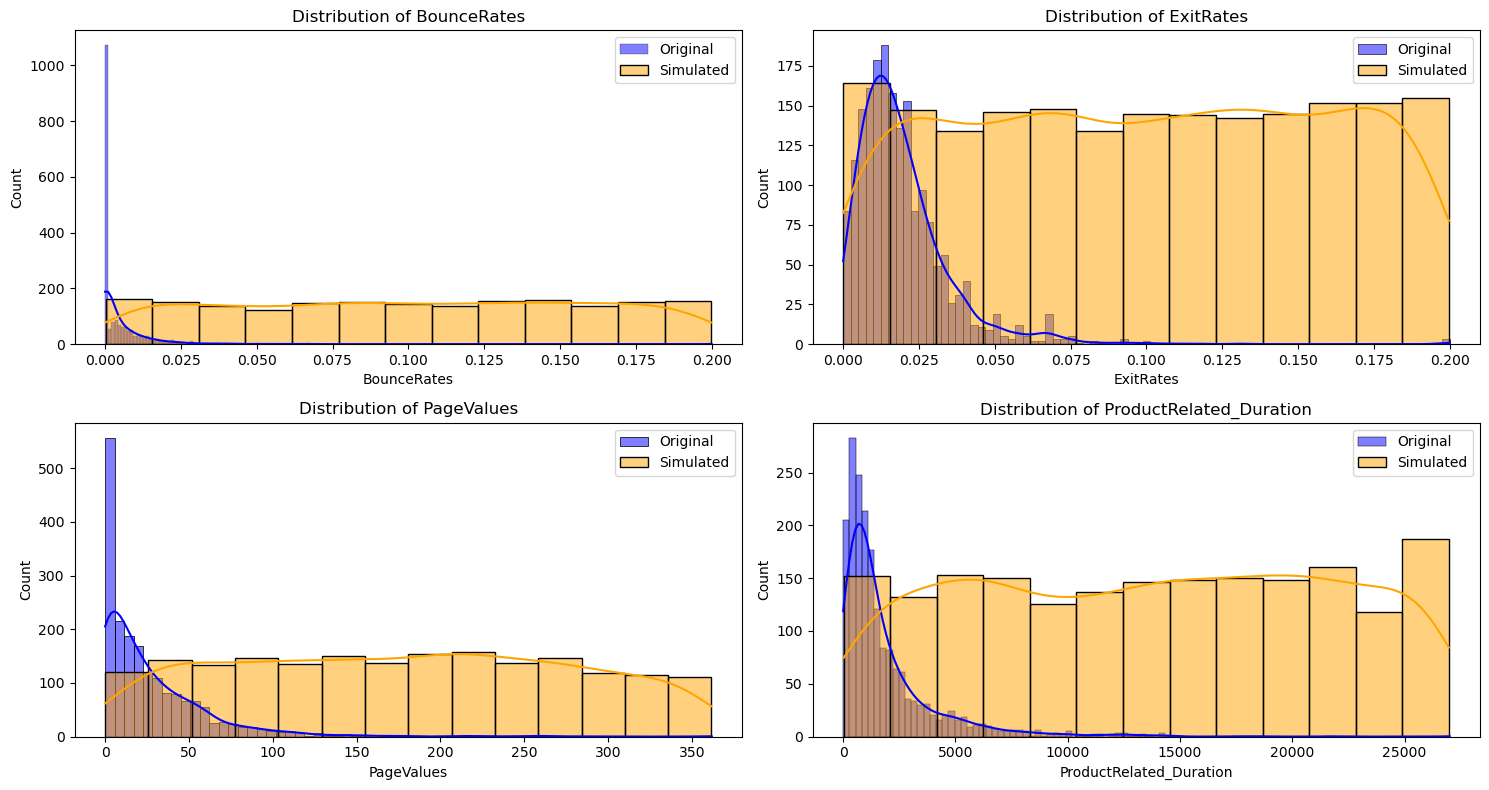

In [13]:
# Descriptive statistics
original_stats = df_successful[variables_of_interest].describe()
simulated_stats = simulated_df.describe()

# Visualizations
plt.figure(figsize=(15, 8))

for i, variable in enumerate(variables_of_interest, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_successful[variable], kde=True, color='blue', label='Original', alpha=0.5)
    sns.histplot(simulated_df[variable], kde=True, color='orange', label='Simulated', alpha=0.5)
    plt.title(f'Distribution of {variable}')
    plt.legend()

plt.tight_layout()
plt.show()





At this step, It`s clear that I used wrong distributions that lead to really bad simulation. I will start again trying to find better distribution

In this modification:

For BounceRates and ExitRates, I've used a beta distribution, which can be left-skewed (right-skewed?) by adjusting the parameters.
For PageValues and ProductRelated_Duration, I've used an exponential distribution, which is often used to simulate skewed data.

In [14]:


# Find min and max for each variable in the original dataset
min_values = df_successful[variables_of_interest].min()
max_values = df_successful[variables_of_interest].max()

# Simulate data within min-max range using left-skewed distributions
simulated_data2 = {
    'BounceRates': np.random.beta(2, 5, num_successful_transactions) * max_values['BounceRates'],
    'ExitRates': np.random.beta(2, 5, num_successful_transactions) * max_values['ExitRates'],
    'PageValues': np.random.exponential(5, num_successful_transactions),
    'ProductRelated_Duration': np.random.exponential(150, num_successful_transactions),
}

# Create a DataFrame to store the modified simulated data
simulated_df2 = pd.DataFrame(simulated_data2)

# Display the first few rows of the modified simulated data
simulated_df2.head()


,BounceRates,ExitRates,PageValues,ProductRelated_Duration
0,0.046844,0.065043,3.690038,305.592962
1,0.085280,0.105365,5.353895,104.784516
2,0.013749,0.064513,16.563836,11.387748
3,0.060157,0.060876,2.904097,90.452648
4,0.019056,0.007150,6.869196,213.554158


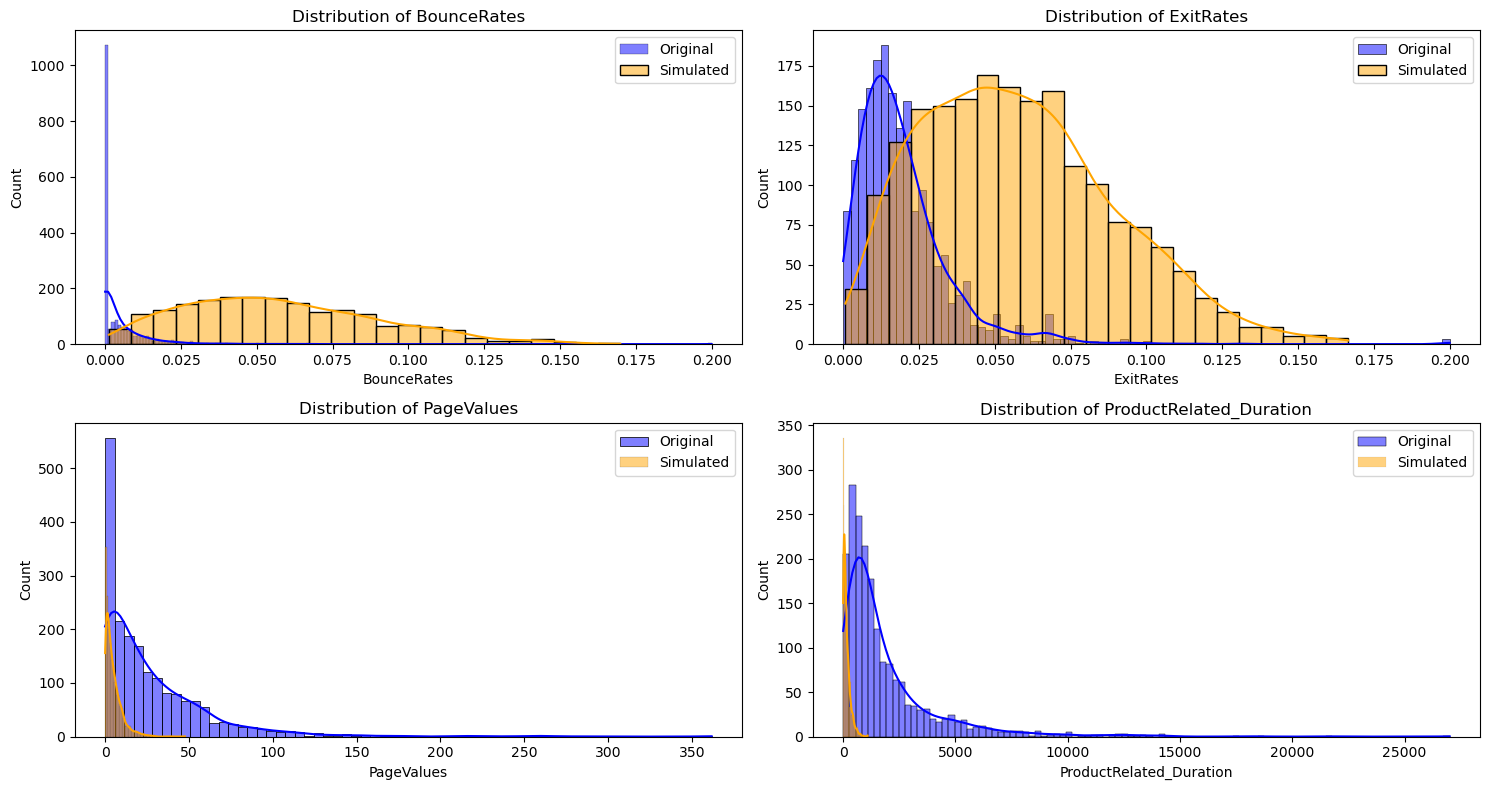

In [15]:
# Descriptive statistics
original_stats = df_successful[variables_of_interest].describe()
simulated_stats2 = simulated_df2.describe()

# Visualizations
plt.figure(figsize=(15, 8))

for i, variable in enumerate(variables_of_interest, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_successful[variable], kde=True, color='blue', label='Original', alpha=0.5)
    sns.histplot(simulated_df2[variable], kde=True, color='orange', label='Simulated', alpha=0.5)
    plt.title(f'Distribution of {variable}')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import kstest, anderson

# Example using the Kolmogorov-Smirnov test
ks_stat, ks_p_value = kstest(df_successful['BounceRates'], 'beta', args=(2, 5))
print(f"Kolmogorov-Smirnov test p-value: {ks_p_value}")

# Example using the Anderson-Darling test
ad_stat, ad_critical_values, ad_significance_levels = anderson(df_successful['BounceRates'], dist='beta')
print(f"Anderson-Darling test statistic: {ad_stat}")
print(f"Critical values: {ad_critical_values}")


NameError: name 'df_successful' is not defined